In [41]:
import numpy as np
import pandas as pd
from sklearn.svm import SVR
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt

In [71]:
data=pd.read_csv('E:/rahul/processed_data/18VGHZdata.csv')
x=np.array(data['BT_18V'])
y=np.array(data['EMISSIVTY_18V'])

In [72]:
x

array([299. , 301.7, 300.5, ..., 301.6, 301.7, 301.8])

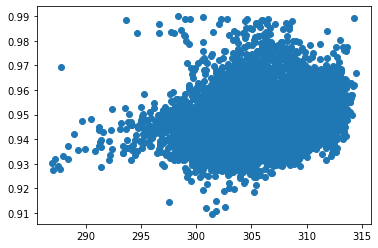

In [73]:
plt.scatter(x,y)

In [74]:
X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size=0.30, random_state=42)

In [75]:
X_train=X_train.reshape(-1,1)
Y_train=Y_train.reshape(-1,1)

In [76]:
sc_X=StandardScaler()  
sc_Y=StandardScaler()  
X_train_sc=sc_X.fit_transform(X_train)
Y_train_sc=sc_Y.fit_transform(Y_train)

In [77]:
X_train_sc

array([[-0.57943292],
       [-0.10268029],
       [ 1.52831553],
       ...,
       [ 1.10174739],
       [-0.93072432],
       [ 0.39916458]])

In [78]:
regressor=SVR(kernel='rbf')
regressor.fit(X_train_sc,Y_train_sc)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


SVR()

In [79]:
Y_pred=sc_Y.inverse_transform(regressor.predict(sc_X.transform(X_test.reshape(-1,1))))

In [80]:
r2_score(Y_test,Y_pred)

0.007453880192231699

In [81]:
df=pd.DataFrame({})
df['emiss']=Y_test
df['pred']=Y_pred
df['diff']=Y_test-Y_pred
df

,emiss,pred,diff
0,0.945710,0.946170,-0.000459
1,0.952689,0.946150,0.006539
2,0.953814,0.944269,0.009545
3,0.938107,0.946327,-0.008219
4,0.941832,0.944080,-0.002247
...,...,...,...
2229,0.956938,0.946099,0.010839
2230,0.945416,0.946968,-0.001552
2231,0.959539,0.946896,0.012643
2232,0.951267,0.944051,0.007216


In [82]:
df.describe()

,emiss,pred,diff
count,2234.000000,2234.000000,2234.000000
mean,0.947518,0.946009,0.001509
std,0.010418,0.001392,0.010269
min,0.909637,0.933116,-0.034368
25%,0.940506,0.945023,-0.005370
50%,0.945955,0.946170,-0.000178
75%,0.952716,0.946817,0.006436
max,0.989985,0.954290,0.046407


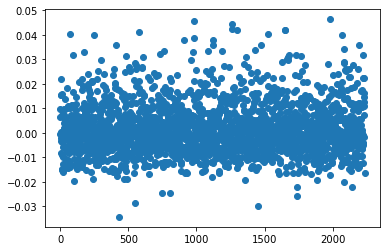

In [86]:
plt.scatter(df.index.values,df['diff'])

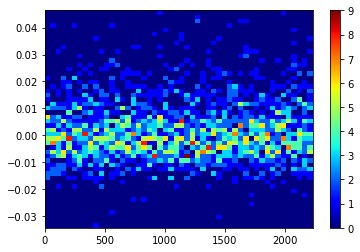

In [89]:
plt.hist2d(df.index.values,df['diff'], (50, 50), cmap=plt.cm.jet)
plt.colorbar()